## DAB200 - Practice Lab 1 

## Part 1- KNN Classifier

In [63]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Automating Steps

To build a k nearest neighbors classifier for different values of k by upating the value of k manually each time is a tedious process. We will try to automate this. To do this we will use a `for` loop.

##### Digression: `for` loops in Python

A basic `for` loop is written as follows:

In [53]:
import numpy as np 
import pandas as pd

for i in np.arange(5):    # signals the start of the loop
    print(i)              # represents the body of the loop

0
1
2
3
4


Note that any code that is part of the `for` loop 
needs to be indented 4 spaces (your "tab" key should 
automatically do this for you). Also note that the 
number 5 was not printed. The `arange()` function 
will create a sequence up to but not including the number you supply. 
We can also set the starting point of this sequence:

In [34]:
for i in np.arange(2, 5):
    print(i)

2
3
4


Note here that the initial 2 is printed, but again the loop only 
goes up to 4 as noted above. 

This type of loop could be used as follows:

In [35]:
y = np.array([1, 0, 0, 1, 1, 0])
length_y = len(y)

for i in np.arange(length_y):     
    print(y[i])                   

1
0
0
1
1
0


Many Python objects are iterable, meaning we can iterate over 
the items contained within them. Let's look at a few of these 
and how they work with a `for` loop. 

In [36]:
# a string
my_name = "Manjari"

for letter in my_name:
    print(letter)

M
a
n
j
a
r
i


In [37]:
# a list
my_list = ['time', 'for', 'Python']

for item in my_list:
    print(item)

time
for
Python


In [38]:
# a dictionary
my_dict = {'item_1': 24, 'item_2': 10, 'item_3': 67}

for key, value in my_dict.items():
    print(key, value)

item_1 24
item_2 10
item_3 67


You see, in the code above, that for a more complicated structure 
like a dictionary we need to provide more than one dummy variable 
(`key` and `value`, or any other suitable names) and add the 
`.items()` method. 

Another convenient thing we can do is add an element 
to a list every time the `for` loop executes the code
in the body of the loop. Here is an example:

In [39]:
my_new_list = []         # creates an empty list
my_list = [5, 6, 7]

print("my_new_list BEFORE the for loop is", my_new_list)

for item in my_list:
    print(item)
    my_new_list.append(item)

print("my_new_list AFTER the for loop is", my_new_list)


my_new_list BEFORE the for loop is []
5
6
7
my_new_list AFTER the for loop is [5, 6, 7]


It's time to use what you have just learned to help automate 
building a classifier for different values of k. 

#### Step 1. Load the data

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

#### Step 2. All the code you need

In [41]:
from sklearn.neighbors import KNeighborsClassifier  

n_neighbors = [1, 3, 5]
acc_train = []
acc_test = []
for n in n_neighbors:
    print("Building model for k = ", n)

    clf = KNeighborsClassifier(n_neighbors=n) 
    clf.fit(X_train, y_train)  
     
    acc_test.append(clf.score(X_test, y_test))
    acc_train.append(clf.score(X_train, y_train))

Building model for k =  1
Building model for k =  3


Building model for k =  5


#### Step 3. Basic structure you need to create

The basic structure that you'll need to create is as follows:

- Initial code: 
    - First you include code that only needs to be executed once, not every time the for loop is executed
- Start for loop: 
    - Start your for loop, making sure it will run the correct number of times or iterate over the necessary Python object
- Body: 
    - Every time the code in the body of the loop is executed you should build a model for a different value of k 
    - Every line of code in the body needs to be indented 4 spaces
    - This is also the place where you can add the train/test accuracies to lists you created in the 'Initial code' section. 

#### Step 4. Your turn: create the `for` loop 

In [42]:
# TO DO: Using Step 3 as a guide, rearrange the code
# found in Step 2 to create the code necessary to 
# build a classifier using a for loop.





### Cancer data 

Let's now take a look at another data set: the Wisconsin Breast Cancer dataset. This dataset contains clinical measurements of breast cancer tumours, which represent the features. The target variable is recorded as either "benign" (for harmless tumours) or "malignant" (for cancerous tumours). 

#### Load the data

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### Look at the data

If you execute the code `type(cancer)` you'll see that our dataset is being stored in a structure referred to as `sklearn.utils.Bunch`. For our purposes, this data structure functions like a Python `dictionary`, which contains a set of `keys` and associated `values`. 

To see the keys, use the following command:

In [44]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

To access the values of a particular key you can do one of the following:

In [45]:
cancer['filename']

'breast_cancer.csv'

The `values` associated with a key can be of different data types and structures. To see what type of structure you are dealing with you can use:

In [46]:
type(cancer['filename'])

str

Here we see that the value associated with key `filename` of the `cancer` data is a string (`str`), which makes sense since it is the name of a file. Once you know what you are dealing with you can use all the commands/functions/methods available for that type of data structure. For example, we can convert this to uppercase or subset (something that can be useful for automated file processing): 

In [47]:
print(cancer['filename'].upper())
print(cancer['filename'][0:9])

BREAST_CANCER.CSV
breast_ca


Take a moment now to explore the values corresponding to the keys in the `cancer` dataset. 

In [48]:
# should be at least 6 lines of code attempting to look at the 6 keys in the cancer data noted above
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Using the code below and what you discovered about the data above, determine what the numeric target values refer to; that is, which value means "benign" and which means "malignant".

In [49]:
import numpy as np

np.bincount(cancer.target)
unique, counts = np.unique(cancer.target, return_counts=True)
target_counts = dict(zip(unique, counts))
print(target_counts)

{0: 212, 1: 357}


#### Split the data into train and test sets

Insert the code necessary to split the `cancer` data into training and test sets. (Remember to set the `random_state` variable to an integer value so that you will get the same split when you rerun the code.)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

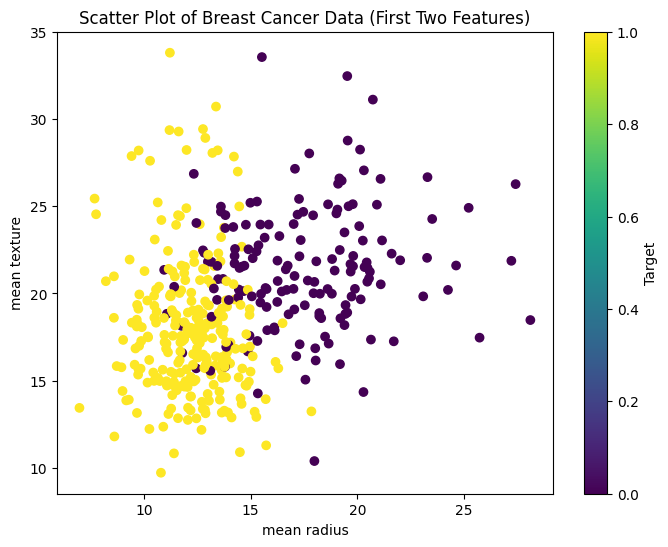

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Create a scatter plot for the first two features (columns 0 and 1) in the training set
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('Scatter Plot of Breast Cancer Data (First Two Features)')
plt.colorbar(label='Target')
plt.show()


#### Build a model

Similar to what you did for the `iris` dataset at the start of this lab, write code that will use a `for` loop to build a model for `k` ranging from 1 to 10. 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=[i for i in range(1,11)]
acc_train=[]
acc_test=[]

for n in n_neighbors:
    print("Building model for k=",n)
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)

    acc_train.append(clf.score(X_train,y_train))
    acc_test.append(clf.score(X_test,y_test))

# print(acc_test,acc_train)

Building model for k= 1
Building model for k= 2
Building model for k= 3
Building model for k= 4
Building model for k= 5
Building model for k= 6
Building model for k= 7
Building model for k= 8
Building model for k= 9
Building model for k= 10


Building model for k=1
Building model for k=2
Building model for k=3
Building model for k=4
Building model for k=5
Building model for k=6
Building model for k=7
Building model for k=8
Building model for k=9
Building model for k=10


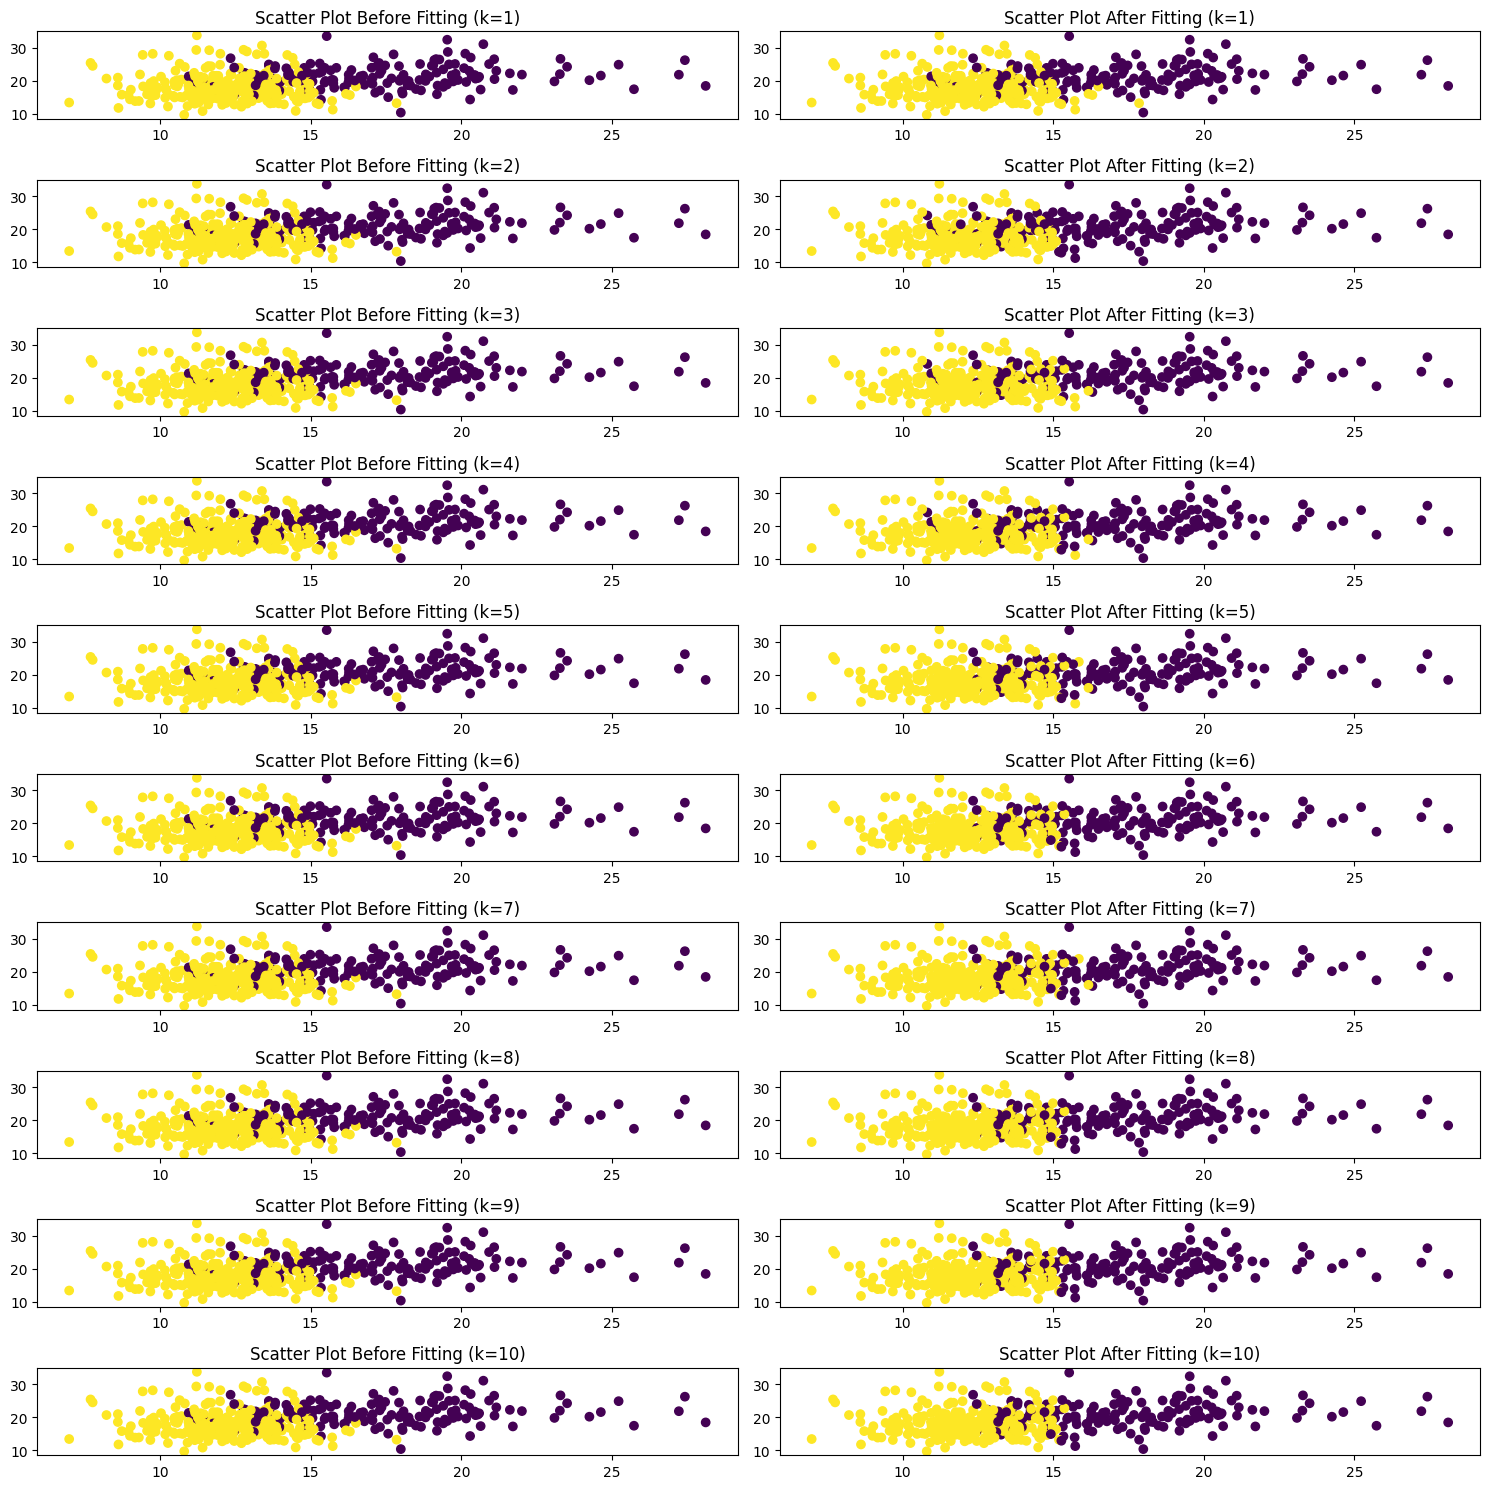

In [57]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the range of k values
n_neighbors = range(1, 11)
acc_train = []
acc_test = []

# Create a figure to hold the subplots
fig, axs = plt.subplots(len(n_neighbors), 2, figsize=(15, 15))

# Loop over each value of k
for i, n in enumerate(n_neighbors):
    # Before fitting
    axs[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
    axs[i, 0].set_title(f'Scatter Plot Before Fitting (k={n})')

    # Fit the model
    print(f"Building model for k={n}")
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)

    # After fitting
    axs[i, 1].scatter(X_train[:, 0], X_train[:, 1], c=clf.predict(X_train), cmap='viridis')
    axs[i, 1].set_title(f'Scatter Plot After Fitting (k={n})')

    # Calculate and store accuracy
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

# Show the plots
plt.tight_layout()
plt.show()


**confusion matrix**

In [52]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)



array([[49,  4],
       [ 4, 86]], dtype=int64)

**classification report**

there are two types in classification report
1. from sklearn
2. from crosstab method of pandas

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [54]:
#2.cross tab method of pandas
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,49,4,53
1,4,86,90
All,53,90,143


#### Plot your results

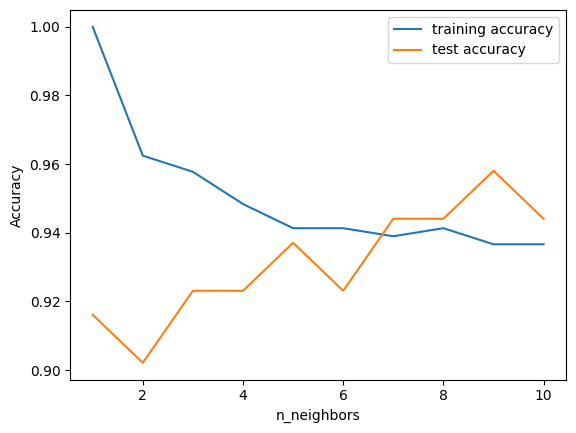

In [55]:
# plots will be different if random_state in train_test_split is different
import matplotlib.pyplot as plt
plt.plot(n_neighbors, acc_train, label="training accuracy")
plt.plot(n_neighbors, acc_test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

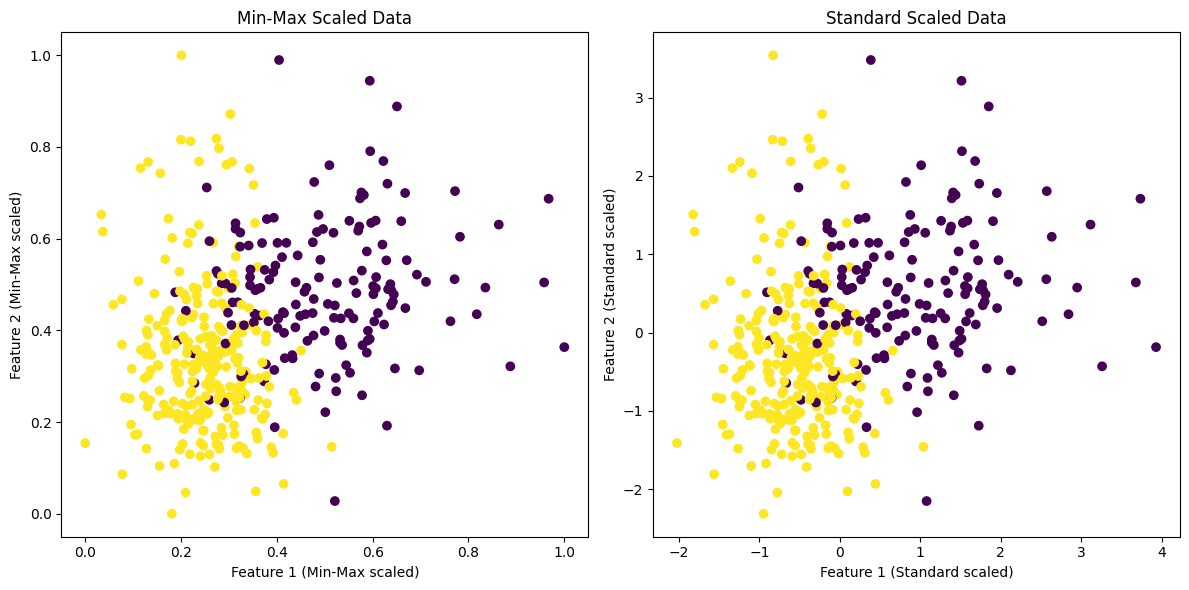

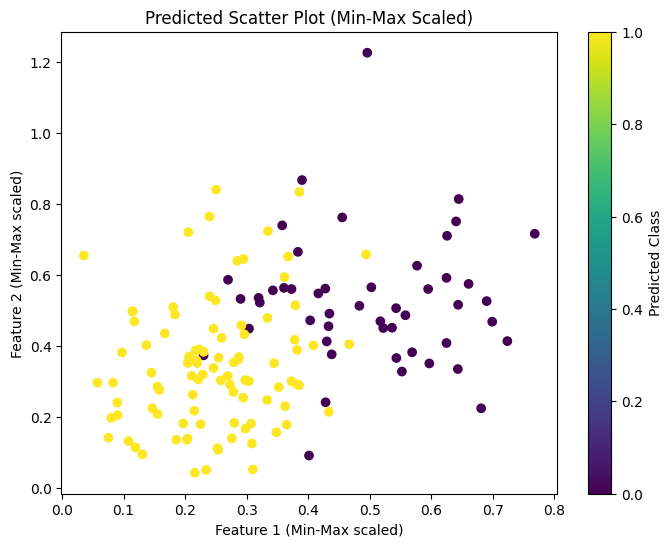

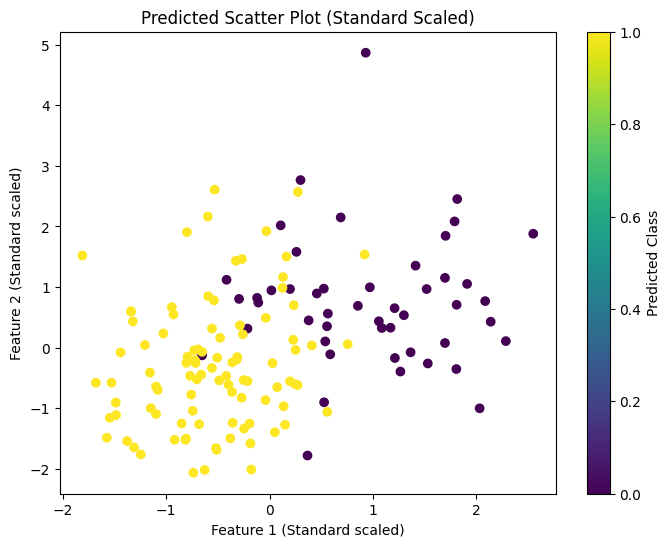

In [58]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Apply Min-Max scaling and Standard scaling to the data
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Fit the model with Min-Max scaled data
clf_minmax = KNeighborsClassifier(n_neighbors=5)
clf_minmax.fit(X_train_minmax, y_train)

# Fit the model with Standard scaled data
clf_standard = KNeighborsClassifier(n_neighbors=5)
clf_standard.fit(X_train_standard, y_train)

# Create a scatter plot for the Min-Max scaled data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_minmax[:, 0], X_train_minmax[:, 1], c=y_train, cmap='viridis')
plt.title('Min-Max Scaled Data')
plt.xlabel('Feature 1 (Min-Max scaled)')
plt.ylabel('Feature 2 (Min-Max scaled)')

# Create a scatter plot for the Standard scaled data
plt.subplot(1, 2, 2)
plt.scatter(X_train_standard[:, 0], X_train_standard[:, 1], c=y_train, cmap='viridis')
plt.title('Standard Scaled Data')
plt.xlabel('Feature 1 (Standard scaled)')
plt.ylabel('Feature 2 (Standard scaled)')

plt.tight_layout()
plt.show()

# Predict using the Min-Max scaled data
y_pred_minmax = clf_minmax.predict(X_test_minmax)

# Predict using the Standard scaled data
y_pred_standard = clf_standard.predict(X_test_standard)

# Create a scatter plot for the predicted Min-Max scaled data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_minmax[:, 0], X_test_minmax[:, 1], c=y_pred_minmax, cmap='viridis')
plt.title('Predicted Scatter Plot (Min-Max Scaled)')
plt.xlabel('Feature 1 (Min-Max scaled)')
plt.ylabel('Feature 2 (Min-Max scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Create a scatter plot for the predicted Standard scaled data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_standard[:, 0], X_test_standard[:, 1], c=y_pred_standard, cmap='viridis')
plt.title('Predicted Scatter Plot (Standard Scaled)')
plt.xlabel('Feature 1 (Standard scaled)')
plt.ylabel('Feature 2 (Standard scaled)')
plt.colorbar(label='Predicted Class')
plt.show()


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to perform cross-validation and return the mean accuracy
def cross_val_mean_knn(k, metric='euclidean'):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    return np.mean(cv_scores)

# Choose the optimal k value using cross-validation
k_values = range(1, 21)
mean_cv_scores = [cross_val_mean_knn(k) for k in k_values]
optimal_k = k_values[np.argmax(mean_cv_scores)]

# Choose the optimal distance metric
metrics = ['euclidean', 'manhattan', 'chebyshev']
mean_cv_scores_metrics = {metric: cross_val_mean_knn(optimal_k, metric) for metric in metrics}
optimal_metric = max(mean_cv_scores_metrics, key=mean_cv_scores_metrics.get)

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the final k-NN model using the optimal k and distance metric
knn_final = KNeighborsClassifier(n_neighbors=optimal_k, metric=optimal_metric)
knn_final.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred = knn_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal k: {optimal_k}")
print(f"Optimal distance metric: {optimal_metric}")
print(f"Accuracy on test set: {accuracy}")


Optimal k: 12
Optimal distance metric: euclidean
Accuracy on test set: 0.951048951048951


## Part 2- KNN Regressor 

We will now explore in more detail the concept of *scaling* features. For some machine learning algorithms (like k nearest neighbours), if your features are measured on very different scales it can cause problems. If this is the case, the 'larger' features can look more important to the algorithm than the 'smaller' features. 

Consider two features for a house: number of bathrooms and size in square feet. Number of bathrooms is usually in the range of 1-5, while house size is measured in 1000's of square feet. For k nearest neighbours, when we calculate the distance between a test point and our training data for housing data, the answer is dominated by the house size. From a practical point of view, this means that we will get essentially the same answer if we ignore the number of bathrooms completely. But we know the number of bathrooms is an important feature in determing house prices. 

We solve this problem through a process called *scaling*, which ensures that all features have values in a similar range. 

In order to determine if we need to scale the features or not, we'll need a way to determine at least the order of magnitude of the values for our features.

### Min, max, and mean

Let's start with a simple $2 x 3$ array and do some basic calculations to determine the minimum, maximum, and average values for each feature.

In [ ]:
import numpy as np

ary = np.array( [[1., 10., 100.], [2., 11.,105.], [4., 12., 120.]])
ary

### Minimum value
We can use Numpy functions to find the minimum value for rows/columns in an array.



In [ ]:
min_axis0 = np.min(ary, axis = 0)
print("Minimum along axis 0 is {}".format(min_axis0))

min_axis1 = np.min(ary, axis = 1)
print("Minimum along axis 1 is {}".format(min_axis1))

Compare our original array to the output above for the two different axes. Take some time to understand how the minimum values for each axis was determined. 

#### Maximum value

We can do something similar to find maximum values. 

In [ ]:
max_axis0 = np.max(ary, axis = 0)
print("Maximum along axis 0 is {}".format(max_axis0))

max_axis1 = np.max(ary, axis = 1)
print("Maximum along axis 1 is {}".format(max_axis1))

Again, compare our original array to the output above for the two different axes and take some time to understand how the maximum values for each axis was determined. 

#### Mean value

We can do something similar to find the mean values. 

In [ ]:
mean_axis0 = np.mean(ary, axis = 0)
print("Mean along axis 0 is {}".format(mean_axis0))

mean_axis1 = np.mean(ary, axis = 1)
print("Mean along axis 1 is {}".format(mean_axis1))

#### Which axis do we choose?

In order to decide which axis (0 or 1) to use, you will need to understand the shape of your data; that is, do the rows represent the features? or do the columns? Knowing this and using the small array example above, you should be able to decide which axis you need. 

### You turn

For the provided `petrol_consumption` dataset calculate the minimum, maximum, and mean values for all the features. 

In [ ]:
import pandas as pd

petrol = pd.read_csv('petrol_consumption.csv')

In [ ]:
petrol.head()

when feature scaling should be implementes?
- whenever the euclidian distance is calculated the feature dcaling should be done 

### Scaling 

We will now practice *scaling* data so that all of the rows/columns (depending on which you need) are on a similar scale. To demonstrate, we will use the small array we created earlier. To do this in `sklearn`, we follow a recipe similar to that for builing a model:

1. Choose the scaler and import it
2. Create an instance of the scaler 
3. Fit it to the data 
4. Transform your data 

To demonstrate this, we'll use the MinMax scaler on the `ary` data we created earlier. 

In [61]:
# from sklearn.preprocessing import MinMaxScaler  # Step 1: choose scaler and import it
# scaler = MinMaxScaler()                         # Step 2: create an instance of the scaler
# scaler.fit(cancer)                                 # Step 3: fit the data; here that means finding the min/max values
# cancer_scaled = scaler.transform(cancer)              # Step 4: transform the data; this step uses the min/max values to calculate the new, scaled values

# print("The original array: \n {}".format(cancer))
# print("The scaled array: \n {}".format(cancer_scaled))
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Step 1: Choose scaler and import it
scaler = MinMaxScaler()

# Step 2: Create an instance of the scaler
scaler.fit(cancer.data)

# Step 3: Fit the data; here that means finding the min/max values
# This step is done automatically by scaler.fit()

# Step 4: Transform the data; this step uses the min/max values to calculate the new, scaled values
cancer_data_scaled = scaler.transform(cancer.data)

print("The original array: \n {}".format(cancer.data))
print("The scaled array: \n {}".format(cancer_data_scaled))


The original array: 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
The scaled array: 
 [[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


### Your turn

Take a look at the documentation for the [MinMax scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) 

1. What formula is it using to scale the data?
2. When you scale data this way what will the new minimum and maximum values for the features be? 

Now apply this scaling to the `petrol_consumption` data you loaded earlier. For this part, pretend like you are starting from scratch and include all the code necessary to complete Steps 1-4 of the recipe noted above. 

Now that you have scaled the `petrol_consumption` data:

1. Take a look at the scaled data
2. Recalculate the minimum and maximum values for the scaled data